In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter


In [2]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x**2)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

## Data set 1

TimedeltaIndex(['0 days 00:00:00.000000022', '0 days 00:00:00.000000722',
                '0 days 00:00:00.000001422', '0 days 00:00:00.000002122',
                '0 days 00:00:00.000002822', '0 days 00:00:00.000003522',
                '0 days 00:00:00.000004222', '0 days 00:00:00.000004922',
                '0 days 00:00:00.000005622', '0 days 00:00:00.000006322',
                ...
                '0 days 00:00:00.000101522', '0 days 00:00:00.000102222',
                '0 days 00:00:00.000102922', '0 days 00:00:00.000103622',
                '0 days 00:00:00.000104322', '0 days 00:00:00.000105022',
                '0 days 00:00:00.000105722', '0 days 00:00:00.000106422',
                '0 days 00:00:00.000107122', '0 days 00:00:00.000107822'],
               dtype='timedelta64[ns]', length=155, freq='700ns')


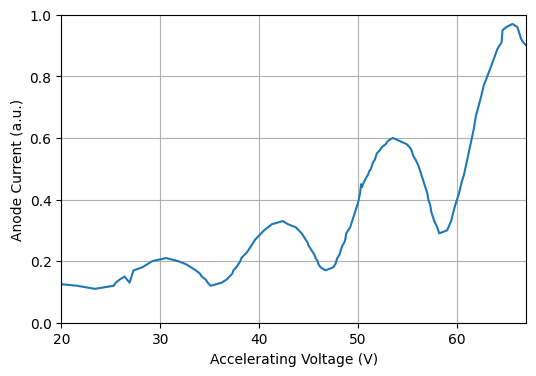

In [3]:
filepath = 'Franck-Hertz-Set-1.csv'
df = pd.read_csv(filepath)
dt = 7e-7  # seconds
df.index = pd.timedelta_range(start=22, freq=pd.to_timedelta(dt, unit='s'), periods=len(df))
print(df.index)

plt.figure(figsize=(6, 4), clear=True)
plt.plot(df['V'], df['I'], '-') 
plt.xlabel('Accelerating Voltage (V)')
plt.ylabel('Anode Current (a.u.)')
plt.xlim(20, 67)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

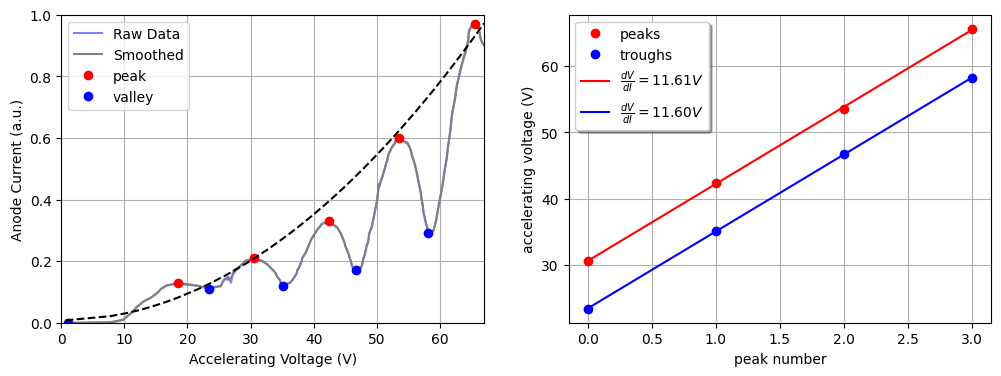

In [4]:
I_smooth = savgol_filter(df['I'], window_length=5, polyorder=3)  

plt.figure(figsize=(12, 4), clear=True)

plt.subplot(121)
plt.plot(df['V'], df['I'], 'b', alpha=0.5, label='Raw Data')  # original noisy curve
plt.plot(df['V'], I_smooth, color='gray', label='Smoothed')
plt.xlabel('Accelerating Voltage (V)')
plt.ylabel('Anode Current (a.u.)')
plt.xlim(0, 67)
plt.ylim(0, 1)
plt.grid(True)

peaks, _ = find_peaks(I_smooth, distance=10)
valleys, _ = find_peaks(-I_smooth, distance=10)
V_peaks, I_peaks = df.iloc[peaks].values.T
V_troughs, I_troughs = df.iloc[valleys].values.T
m,c = fit(V_peaks**2, I_peaks)

plt.plot(V_peaks, I_peaks, 'ro', label='peak')
plt.plot(V_troughs, I_troughs, 'bo', label='valley')
plt.plot(df['V'], m*df['V']**2+c, 'k--')
plt.legend()

V_peaks, V_troughs = V_peaks[1:,], V_troughs[1:]
x_peaks = np.arange(len(V_peaks))
m_peaks, c_peaks = fit(x_peaks, V_peaks)
x_troughs = np.arange(len(V_troughs))
m_troughs, c_troughs = fit(x_troughs, V_troughs)

plt.subplot(122)
plt.plot(V_peaks, 'ro', label='peaks')
plt.plot(V_troughs, 'bo', label='troughs')
plt.plot(x_peaks, m_peaks*x_peaks + c_peaks, 'r-', label=rf'$\frac{{dV}}{{dI}}={m_peaks:.2f} V$')
plt.plot(x_troughs, m_troughs*x_troughs + c_troughs, 'b-', label=rf'$\frac{{dV}}{{dI}}={m_troughs:.2f} V$')
plt.xlabel('peak number')
plt.ylabel('accelerating voltage (V)')
plt.legend(shadow=True)
plt.grid()
plt.show()

In [5]:
print(np.diff(V_peaks))

print(np.diff(V_peaks).mean())

print(np.diff(V_peaks).std() / np.sqrt(len(peaks)))

[11.8 11.1 12.1]
11.666666666666664
0.1873795909674013


## Data set 2

                           V       I
0 days 00:00:00         -0.2  -0.007
0 days 00:00:00.001000   1.1  -0.005
0 days 00:00:00.002000   2.0  -0.036
0 days 00:00:00.003000   3.0  -0.045
0 days 00:00:00.004000   4.0  -0.150
...                      ...     ...
0 days 00:00:00.246000  84.6  22.604
0 days 00:00:00.247000  84.7  22.912
0 days 00:00:00.248000  84.8  23.349
0 days 00:00:00.249000  84.9  24.017
0 days 00:00:00.250000  85.0  24.824

[251 rows x 2 columns]


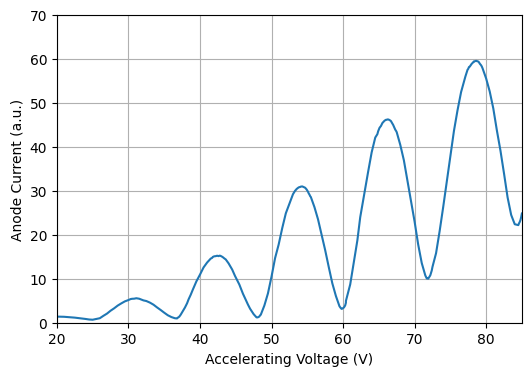

In [6]:
filepath = 'Franck-Hertz-Set-2.csv'
df = pd.read_csv(filepath, header=None, names=['V', 'I'])
dt = 1e-3  # seconds
df.index = pd.timedelta_range(start=0, freq=pd.to_timedelta(dt, unit='s'), periods=len(df))
print(df)

plt.figure(figsize=(6, 4), clear=True)
plt.plot(df['V'], df['I'], '-') 
plt.xlabel('Accelerating Voltage (V)')
plt.ylabel('Anode Current (a.u.)')
plt.xlim(20, 85)
plt.ylim(0, 70)
plt.grid(True)
plt.show()

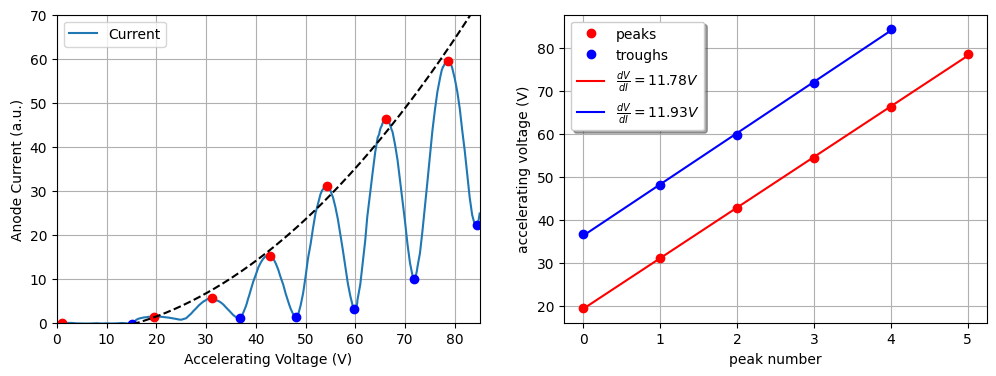

In [11]:
peaks, _ = find_peaks(df['I'], distance=20)
valleys, _ = find_peaks(-df['I'], distance=20)
V_peaks, I_peaks = df.iloc[peaks].values.T
V_troughs, I_troughs = df.iloc[valleys].values.T

plt.figure(figsize=(12,4))

m,c = fit(V_peaks[1:]**2, I_peaks[1:] )

plt.subplot(121)
plt.plot(df['V'], df['I'], '-', label='Current')
plt.plot(V_peaks, I_peaks, 'ro')
plt.plot(V_troughs, I_troughs, 'bo')
plt.plot(df['V'],m*df['V']**2+c, 'k--')
plt.xlabel('Accelerating Voltage (V)')
plt.ylabel('Anode Current (a.u.)')
plt.xlim(0, 85)
plt.ylim(0, 70)
plt.grid(True)
plt.legend()

V_peaks, V_troughs = V_peaks[1:,], V_troughs[1:]
x_peaks = np.arange(len(V_peaks))
m_peaks, c_peaks = fit(x_peaks, V_peaks)
x_troughs = np.arange(len(V_troughs))
m_troughs, c_troughs = fit(x_troughs, V_troughs)

plt.subplot(122)
plt.plot(V_peaks, 'ro', label='peaks')
plt.plot(V_troughs, 'bo', label='troughs')
plt.plot(x_peaks, m_peaks*x_peaks + c_peaks, 'r-', label=rf'$\frac{{dV}}{{dI}}={m_peaks:.2f} V$')
plt.plot(x_troughs, m_troughs*x_troughs + c_troughs, 'b-', label=rf'$\frac{{dV}}{{dI}}={m_troughs:.2f} V$')
plt.xlabel('peak number')
plt.ylabel('accelerating voltage (V)')
plt.legend(shadow=True)
plt.grid()
plt.show()

In [8]:
print(np.diff(V_peaks))

print(np.diff(V_peaks).mean())

print(np.diff(V_peaks).std() / np.sqrt(len(peaks)))

[11.6 11.7 11.5 11.9 12.4]
11.819999999999999
0.12047524938461619


In [9]:
kB = 1.380649e-23      # J/K
T = 388.0              # K (e.g. 115 C)
d = 2.9e-10            # m (Hg effective diameter, approximate)
p = 100.0              # Pa (Hg vapour pressure at T, example)

lam = kB * T / (np.sqrt(2) * np.pi * d**2 * p)
print(f"mean free path lambda = {lam:.3e} m = {lam*1e3:.3f} mm")


mean free path lambda = 1.434e-04 m = 0.143 mm


In [10]:
V_typical = V_peaks[1]            # use first peak voltage (or pick appropriate V)
deltaV = np.mean(np.diff(V_peaks))  # mean spacing (in volts)

L = 0.01  # m, set to your known cathode-grid distance (default 1 cm)
s = (deltaV * L) / V_typical
lam_est = s

print(f"deltaV (mean peak spacing) = {deltaV:.3f} V")
print(f"Using L = {L:.3e} m and V_typical = {V_typical:.3f} V")
print(f"Estimated lambda ≈ {lam_est:.3e} m = {lam_est*1e3:.3f} mm")


deltaV (mean peak spacing) = 11.820 V
Using L = 1.000e-02 m and V_typical = 31.100 V
Estimated lambda ≈ 3.801e-03 m = 3.801 mm
